In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
from sklearn.decomposition import PCA


# Data

In [4]:

data = pd.read_csv('dataset_tissue.txt', delimiter=',', header=0, index_col=0)

tissuesName = pd.read_csv('clase.txt', delimiter=',', header=0, index_col=0)

tissuesName = tissuesName['x']

data = data.T



In [5]:
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.921690,5.718190,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.339130,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.962430,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.415980,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.603650,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,8.205598,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.540570


# PCA - N components necesarios

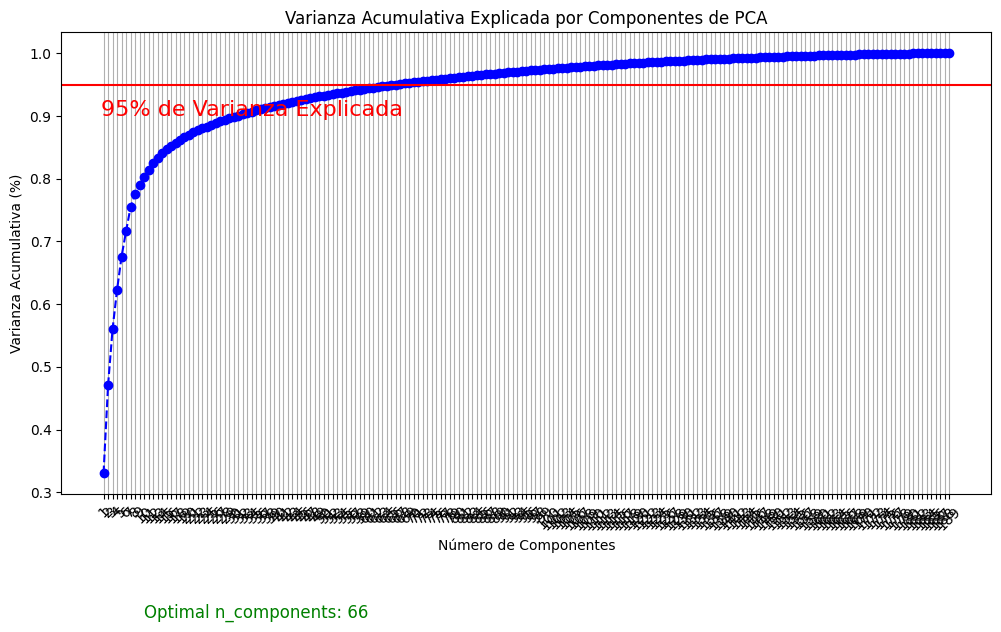

El número óptimo de componentes principales para alcanzar o superar el 95% de varianza es: 66


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA a los datos
pca = PCA()
pca.fit(data)

# Realizar el análisis de la varianza acumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número óptimo de componentes para alcanzar o superar el 95% de varianza
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Visualizar la varianza acumulativa
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes')
plt.xticks(np.arange(1, len(cumulative_variance) + 1), rotation=45)  # Rotar etiquetas
plt.ylabel('Varianza Acumulativa (%)')
plt.title('Varianza Acumulativa Explicada por Componentes de PCA')

# Agregar una línea de corte al 95% de varianza explicada
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% de Varianza Explicada', color='red', fontsize=16)

# Imprimir el número óptimo de componentes
plt.text(10, 0.1, f'Optimal n_components: {optimal_n_components}', fontsize=12, color='green')

plt.grid(axis='x')
plt.show()

print(f'El número óptimo de componentes principales para alcanzar o superar el 95% de varianza es: {optimal_n_components}')





# Aplica PCA con los N-Components necesarios

In [7]:

n_components = optimal_n_components 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data)

pca_results = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


pca_results.to_csv('dataset_tissue_PCA.csv', index=False)


# Aplico DBSCAN

In [9]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(data, point_index, eps):
    neighbors = []
    for i in range(len(data)):
        if i != point_index and euclidean_distance(data[point_index], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, neighbors, cluster_id, eps, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        q = neighbors[i]
        if labels[q] == -1:
            labels[q] = cluster_id
        elif labels[q] == 0:
            labels[q] = cluster_id
            new_neighbors = region_query(data, q, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)
        i += 1

def dbscan(data, eps, min_samples):
    labels = [0] * len(data)
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] == 0:
            neighbors = region_query(data, i, eps)
            if len(neighbors) < min_samples:
                labels[i] = -1  # Noise point
            else:
                cluster_id += 1
                expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels


# Sacar los mejores eps y min_labels

In [11]:
# Load data from a CSV file using Pandas
data = pd.read_csv('pca_results.csv').values

eps = 70  # Set your desired epsilon value
min_samples = 2  # Set your desired minimum number of samples

# Call DBSCAN with your data
result = dbscan(data, eps, min_samples)

# The 'result' list now contains cluster assignments


In [12]:
for i, label in enumerate(result):
    if label == -1:
        print(f"Punto {i}: Ruido")
    else:
        print(f"Punto {i}: Clúster {label}")


Punto 0: Clúster 1
Punto 1: Clúster 2
Punto 2: Clúster 1
Punto 3: Clúster 2
Punto 4: Clúster 2
Punto 5: Clúster 1
Punto 6: Ruido
Punto 7: Clúster 1
Punto 8: Clúster 2
Punto 9: Clúster 1
Punto 10: Clúster 2
Punto 11: Clúster 1
Punto 12: Clúster 2
Punto 13: Clúster 1
Punto 14: Clúster 2
Punto 15: Clúster 1
Punto 16: Clúster 3
Punto 17: Clúster 3
Punto 18: Clúster 3
Punto 19: Clúster 3
Punto 20: Clúster 3
Punto 21: Clúster 3
Punto 22: Clúster 3
Punto 23: Clúster 3
Punto 24: Clúster 3
Punto 25: Clúster 3
Punto 26: Clúster 3
Punto 27: Clúster 3
Punto 28: Clúster 3
Punto 29: Clúster 3
Punto 30: Clúster 3
Punto 31: Clúster 3
Punto 32: Clúster 3
Punto 33: Clúster 3
Punto 34: Clúster 3
Punto 35: Clúster 3
Punto 36: Clúster 3
Punto 37: Clúster 3
Punto 38: Clúster 3
Punto 39: Clúster 3
Punto 40: Clúster 3
Punto 41: Clúster 3
Punto 42: Clúster 3
Punto 43: Clúster 3
Punto 44: Clúster 3
Punto 45: Clúster 3
Punto 46: Clúster 4
Punto 47: Clúster 4
Punto 48: Clúster 4
Punto 49: Clúster 4
Punto 50: Clús

In [14]:
from sklearn.metrics import silhouette_score

# data y result son tus datos y las etiquetas resultantes de DBSCAN

silhouette_avg = silhouette_score(data, result)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3697059283217068


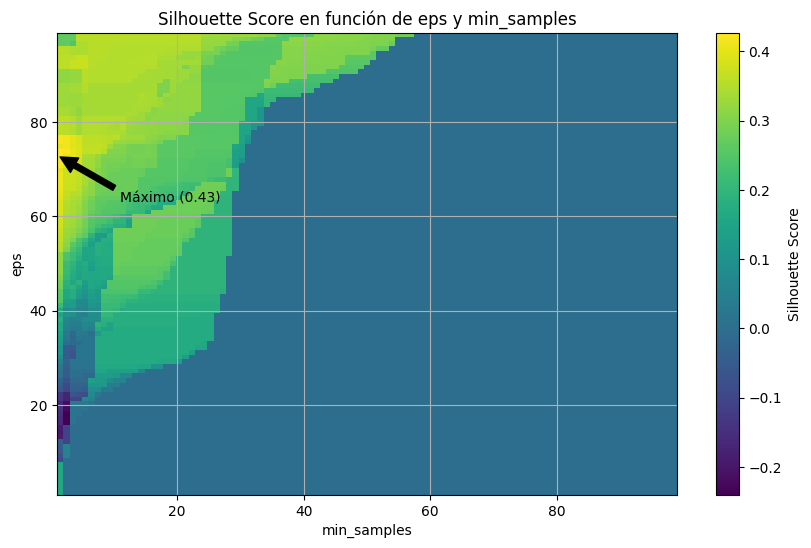

El valor máximo del Silhouette Score es 0.4269920837369194 y se obtiene con eps = 73 y min_samples = 1.


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar los datos reducidos
data_reduced = pd.read_csv("pca_results.csv").values  # Asegúrate de convertir los datos a una matriz NumPy

# Rangos de valores de eps y min_samples
eps_values = np.arange(1, 100)
min_samples_values = np.arange(1, 100)

# Crear una matriz para almacenar los puntajes de silueta
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Implementa tu propia función DBSCAN y asegúrate de almacenar las etiquetas resultantes en cluster_labels

# Calcular el Silhouette Score para cada combinación de eps y min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        cluster_labels = dbscan(data_reduced, eps, min_samples)  # Llama a tu implementación DBSCAN con la función de distancia
        if len(set(cluster_labels)) > 1:  # Asegurarse de que haya al menos 2 grupos
            silhouette_avg = silhouette_score(data_reduced, cluster_labels)
        else:
            silhouette_avg = 0
        silhouette_scores[i][j] = silhouette_avg


# Encontrar el valor máximo del Silhouette Score y sus índices
max_silhouette_score = np.max(silhouette_scores)
best_eps_idx, best_min_samples_idx = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_values[best_eps_idx]
best_min_samples = min_samples_values[best_min_samples_idx]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, extent=[min_samples_values.min(), min_samples_values.max(), eps_values.min(), eps_values.max()],
           aspect='auto', origin='lower')
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Score en función de eps y min_samples')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.grid(True)

# Anotar el valor máximo
plt.annotate(f'Máximo ({max_silhouette_score:.2f})', xy=(best_min_samples, best_eps),
             xytext=(best_min_samples + 10, best_eps - 10), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

print(f"El valor máximo del Silhouette Score es {max_silhouette_score} y se obtiene con eps = {best_eps} y min_samples = {best_min_samples}.")
